<font size="6">**TSF - Task 2**</font>




<font size="5">**Manthan Deshpande**</font>

<font size="3">**"Prediction using Unsupervised ML"**

From the iris dataset predict the optimum number of clusters and representing it visually</font>

Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading the dataset

In [ ]:
iris = pd.read_csv("E:/Iris.csv") #location on my computer
iris.head() #having a look at first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


To find optimum number of clusters using elbow method

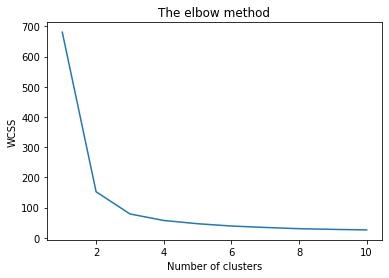

In [ ]:
x = iris.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Using elbow method to find number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

X-axis corresponds to Number of clusters and Y-axis corresponds to WCSS. Number of clusters should be chosen such that the Within Cluster Sum of squares doesn't decrease significantly with every iteration

Here we can see, if we choose number of clusters as 3, the WCSS dosen't decrease significantly in the next iteration. Therefore, It is decided to take number of clusters as 3

Applying kmeans to the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Representing the clusters and their centroids visually

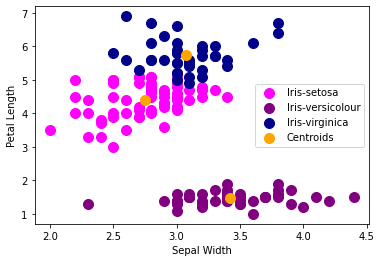

In [ ]:
#Visualizing the clusters on Sepal Width vs Petal Length
#Cluster centroids are represented by orange colour
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
            s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2],
            s = 100, c = 'darkblue', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'orange', label = 'Centroids')
plt.ylabel("Petal Length")
plt.xlabel("Sepal Width")
plt.legend()